<a href="https://colab.research.google.com/github/arshambt/MachineLearning2023/blob/main/Bachelor's_Final_Project/Project_Gan_Best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset_preprocessing

In [ ]:
!nvidia-smi

Thu Jul  4 13:58:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive

 Beheshti_9820293_CCL_HW3.rar		   Dataset_img.zip	  s-parameters.zip
'Colab Notebooks'			   Datasets		 'کلاس بندی مهره های شطرنج.pdf'
'Copy of Session 05 - Chapter 2 - 1.mp4'  'electrical circuits'
 Dataset_1st.zip			  'Getting started.pdf'


In [ ]:
!unzip gdrive/MyDrive/Dataset_img.zip

Archive:  gdrive/MyDrive/Dataset_img.zip
   creating: Dataset_img/
  inflating: Dataset_img/img_1000_1.png  
  inflating: Dataset_img/img_1000_2.png  
  inflating: Dataset_img/img_100_1.png  
  inflating: Dataset_img/img_100_2.png  
  inflating: Dataset_img/img_101_1.png  
  inflating: Dataset_img/img_101_2.png  
  inflating: Dataset_img/img_102_1.png  
  inflating: Dataset_img/img_102_2.png  
  inflating: Dataset_img/img_103_1.png  
  inflating: Dataset_img/img_103_2.png  
  inflating: Dataset_img/img_104_1.png  
  inflating: Dataset_img/img_104_2.png  
  inflating: Dataset_img/img_105_1.png  
  inflating: Dataset_img/img_105_2.png  
  inflating: Dataset_img/img_106_1.png  
  inflating: Dataset_img/img_106_2.png  
  inflating: Dataset_img/img_107_1.png  
  inflating: Dataset_img/img_107_2.png  
  inflating: Dataset_img/img_108_1.png  
  inflating: Dataset_img/img_108_2.png  
  inflating: Dataset_img/img_109_1.png  
  inflating: Dataset_img/img_109_2.png  
  inflating: Dataset_img/img_

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1yY9PLMJ_e2tJdAB0VYtCR1dqUyvT289n
!gdown 1bcdQ-04EcyXGVczyHb5oFkFRX487m3lf

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1yY9PLMJ_e2tJdAB0VYtCR1dqUyvT289n
To: /content/img_1.png
100% 3.62k/3.62k [00:00<00:00, 13.5MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/download.py:33: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = bs4.BeautifulSoup(line, features="html.parser")
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1bcdQ-04EcyXGVczyHb5oFkFRX487m3lf

but Gdown can't. Please check connections and permissions

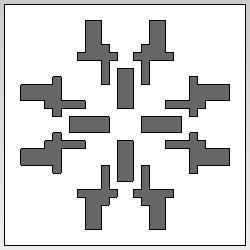

In [ ]:
img = cv2.imread('Dataset_1st/img_1.png')

img2 = img[125:375, 125:375,0].copy()

#cv2.resize(img, (30, 30))
cv2_imshow(img[125:375, 125:375, 0])
img3 = cv2.resize(img2, (30,30))


# 15 * 15

In [ ]:
train_images = []

for i in range (1,1001):
  img = cv2.imread(f'Dataset_img/img_{i}_1.png')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  #img = img[129:251, 129:251]
  #ret, img = cv2.threshold(img, 245, 255, cv2.THRESH_BINARY)
  img = img.astype("float32") / 255.0
  #img = cv2.resize(img, (15,15))
  #img = cv2.resize(img, (28,28))
  img = tf.expand_dims(img, axis=-1)
  train_images.append(img)

print(train_images[2].shape)
print(len(train_images))

(15, 15, 1)
1000


# PLOT

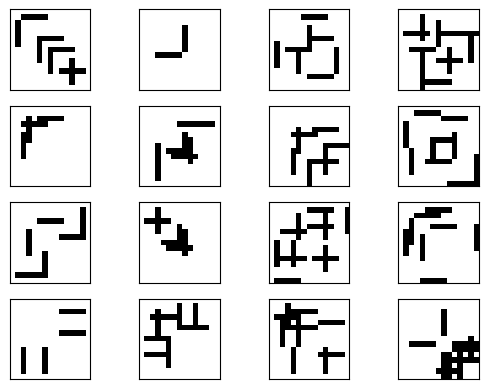

In [ ]:
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(train_images[i+450], cmap="gray")
    plt.xticks([])
    plt.yticks([])

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(train_images)
dataset = dataset.batch(16)
dataset = dataset.shuffle(50)
j=[]
for element in dataset:
  j.append(element)

print(j[10].shape)

(16, 15, 15, 1)


In [ ]:
for n, real_samples in enumerate(dataset):
  i = real_samples.shape

  print(i[0])

16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
8
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16


# model paper

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Conv2DTranspose, LeakyReLU, Reshape, BatchNormalization

# Discriminator model
d_model = Sequential()
d_model.add(Conv2D(64, (3, 3), strides=(2, 2), padding="same", input_shape=(15,15,1)))
d_model.add(BatchNormalization())
d_model.add(LeakyReLU(alpha=0.2))
#d_model.add(Dropout(0.4))
#d_model.add(BatchNormalization())

d_model.add(Conv2D(128, (3, 3), strides=(2, 2), padding="same"))
d_model.add(BatchNormalization())
d_model.add(LeakyReLU(alpha=0.2))
#d_model.add(Dropout(0.4))
#d_model.add(BatchNormalization())

d_model.add(Conv2D(256, (3, 3), strides=(2, 2), padding="same"))
d_model.add(BatchNormalization())
d_model.add(LeakyReLU(alpha=0.2))
#d_model.add(Dropout(0.4))
#d_model.add(BatchNormalization())

#d_model.add(Conv2D(256, (3, 3), strides=(2, 2), padding="same"))
#d_model.add(BatchNormalization())
#d_model.add(LeakyReLU(alpha=0.2))
#d_model.add(Dropout(0.4))
#d_model.add(BatchNormalization())

d_model.add(Flatten())
d_model.add(Dropout(0.4))
#d_model.add(BatchNormalization())

d_model.add(Dense(1, activation='sigmoid'))


# Create the generator
latent_dim = 128
g_model = Sequential()
g_model.add(Dense(1*1*128, input_dim=128))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())



g_model.add(Reshape((1,1,128)))
g_model.add(Conv2DTranspose(256, kernel_size=(4,4), strides=(2,2), padding='same'))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())


g_model.add(Conv2DTranspose(128, kernel_size=(4,4), strides=(2,2), padding='valid'))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())


g_model.add(Conv2DTranspose(64, kernel_size=(4,4), strides=(2,2), padding='same'))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())

g_model.add(Conv2DTranspose(64, kernel_size=(4,4), strides=(1,1), padding='valid'))

g_model.add(Conv2D(1, (4,4), activation='sigmoid', padding='same'))

# Model_best

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Conv2DTranspose, LeakyReLU, Reshape, BatchNormalization

# Discriminator model
d_model = Sequential()
d_model.add(Conv2D(64, (3, 3), strides=(2, 2), padding="valid", input_shape=(15,15,1)))
d_model.add(BatchNormalization())
d_model.add(LeakyReLU(alpha=0.2))
#d_model.add(Dropout(0.4))
#d_model.add(BatchNormalization())

d_model.add(Conv2D(32, (3, 3), strides=(2, 2), padding="valid"))
d_model.add(BatchNormalization())
d_model.add(LeakyReLU(alpha=0.2))
#d_model.add(Dropout(0.4))
d_model.add(BatchNormalization())

d_model.add(Flatten())
d_model.add(Dropout(0.4))
#d_model.add(BatchNormalization())

d_model.add(Dense(1, activation='sigmoid'))


# Create the generator
latent_dim = 128
g_model = Sequential()
g_model.add(Dense(7*7*128, input_dim=128))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())



g_model.add(Reshape((7,7,128)))
g_model.add(Conv2DTranspose(128, kernel_size=(3,3), strides=(1,1), padding='valid'))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())


g_model.add(Conv2DTranspose(128, kernel_size=(4,4), strides=(1,1), padding='valid'))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())


g_model.add(Conv2DTranspose(128, kernel_size=(4,4), strides=(1,1), padding='valid'))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())

g_model.add(Conv2D(64, kernel_size=(4,4), strides=(1,1), padding='same'))

g_model.add(Conv2D(1, (4,4), activation='sigmoid', padding='same'))


# Model_test_(BEST)

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Conv2DTranspose, LeakyReLU, Reshape, BatchNormalization, Activation

# Discriminator model
d_model = Sequential()
d_model.add(Conv2D(64, (4, 4), strides=(2, 2), padding="valid", input_shape=(15,15,1)))
d_model.add(LeakyReLU(alpha=0.2))
#d_model.add(Dropout(0.4))
d_model.add(BatchNormalization())

d_model.add(Conv2D(64, (4, 4), strides=(2, 2), padding="valid"))
d_model.add(LeakyReLU(alpha=0.2))
#d_model.add(Dropout(0.4))
d_model.add(BatchNormalization())



d_model.add(Flatten())
d_model.add(Dropout(0.4))
#d_model.add(BatchNormalization())

d_model.add(Dense(1, activation='sigmoid'))


# Create the generator
latent_dim = 128
g_model = Sequential()
g_model.add(Dense(7*7*128, input_dim=128))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())



g_model.add(Reshape((7,7,128)))
g_model.add(Conv2DTranspose(128, kernel_size=(3,3), strides=(1,1), padding='valid'))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())


g_model.add(Conv2DTranspose(128, kernel_size=(4,4), strides=(1,1), padding='valid'))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())


g_model.add(Conv2DTranspose(128, kernel_size=(4,4), strides=(1,1), padding='valid'))
g_model.add(LeakyReLU(alpha=0.2))
g_model.add(BatchNormalization())

#g_model.add(Conv2D(64, kernel_size=(4,4), strides=(1,1), padding='same'))

#g_model.add(Conv2D(64, kernel_size=(4,4), strides=(1,1), padding='same'))

g_model.add(Conv2D(1, (4,4), activation='sigmoid', padding='same'))

# Process

In [ ]:
d_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 8, 8, 64)          640       
                                                                 
 batch_normalization_15 (Ba  (None, 8, 8, 64)          256       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 8, 8, 64)          0         
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 batch_normalization_16 (Ba  (None, 4, 4, 128)         512       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 4, 4, 128)        

In [ ]:
g_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 leaky_re_lu_100 (LeakyReLU  (None, 128)               0         
 )                                                               
                                                                 
 batch_normalization_105 (B  (None, 128)               512       
 atchNormalization)                                              
                                                                 
 reshape_13 (Reshape)        (None, 1, 1, 128)         0         
                                                                 
 conv2d_transpose_45 (Conv2  (None, 2, 2, 256)         524544    
 DTranspose)                                                     
                                                     

# GAN

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Model

g_opt = Adam(learning_rate=0.0003)
d_opt = Adam(learning_rate=0.00003)

loss_function = BinaryCrossentropy()

In [ ]:
class GAN(Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.d_loss_tracker = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_tracker = tf.keras.metrics.Mean(name="g_loss")

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_images):

        # Sample random points in the latent space
      #threshold = 0.5
      batch_size = tf.shape(real_images)[0]
      random_latent_vectors = tf.random.normal((batch_size, self.latent_dim,1))

        # Decode them to fake images
      generated_samples = self.generator(random_latent_vectors, training=False)
      #generated_samples = tf.where(generated_samples >= threshold, tf.ones_like(generated_samples), tf.zeros_like(generated_samples))

      with tf.GradientTape() as d_tape:

        # Combine them with real images
        combined_images = tf.concat([generated_samples, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)

        # Add random noise to the labels - important trick!
        #labels += 0.05 * tf.random.uniform(tf.shape(labels))
        noise_real = 0.15*tf.random.uniform((batch_size,1))
        noise_fake = 0.15*tf.random.uniform((batch_size,1))

        labels += tf.concat([noise_fake, noise_real], axis=0)

        # Train the discriminator
        #with tf.GradientTape() as tape:
        predictions = self.discriminator(combined_images, training=True)
        d_loss = self.loss_fn(labels, predictions)
      grads = d_tape.gradient(d_loss, self.discriminator.trainable_variables)
      self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_variables))

      with tf.GradientTape() as g_tape:

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal((batch_size, self.latent_dim,1))
        generated_samples = self.generator(random_latent_vectors, training=True)


        ## THRESHOLD FOR GENERATOR'S OUTPUT ##
        #generated_samples = tf.where(generated_samples >= threshold, tf.ones_like(generated_samples), tf.zeros_like(generated_samples))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        #with tf.GradientTape() as tape:
        predictions = self.discriminator(generated_samples, training= False)
        g_loss = self.loss_fn(misleading_labels, predictions)
      grads = g_tape.gradient(g_loss, self.generator.trainable_variables)
      self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))

        # Update metrics and return their value.
      self.d_loss_tracker.update_state(d_loss)
      self.g_loss_tracker.update_state(g_loss)
      return {
            "d_loss": self.d_loss_tracker.result(),
            "g_loss": self.g_loss_tracker.result(),
        }

In [ ]:
gan = GAN(d_model, g_model, latent_dim=128)

gan.compile(
    d_optimizer = d_opt,
    g_optimizer = g_opt,
    loss_fn = loss_function,
     )

history = gan.fit(dataset, epochs = 300)

Epoch 1/300
63/63 [==============================] - 6s 13ms/step - d_loss: 0.4190 - g_loss: 0.5764
Epoch 2/300
63/63 [==============================] - 1s 11ms/step - d_loss: 0.4012 - g_loss: 0.4451
Epoch 3/300
63/63 [==============================] - 1s 12ms/step - d_loss: 0.5174 - g_loss: 0.3817
Epoch 4/300
63/63 [==============================] - 1s 11ms/step - d_loss: 0.6584 - g_loss: 0.3141
Epoch 5/300
63/63 [==============================] - 1s 11ms/step - d_loss: 0.7865 - g_loss: 0.4909
Epoch 6/300
63/63 [==============================] - 1s 11ms/step - d_loss: 0.7921 - g_loss: 0.8603
Epoch 7/300
63/63 [==============================] - 1s 11ms/step - d_loss: 0.6183 - g_loss: 1.5822
Epoch 8/300
63/63 [==============================] - 1s 11ms/step - d_loss: 0.9436 - g_loss: 0.4573
Epoch 9/300
63/63 [==============================] - 1s 14ms/step - d_loss: 0.9898 - g_loss: 1.3175
Epoch 10/300
63/63 [==============================] - 1s 14ms/step - d_loss: 0.9532 - g_loss: 0.8135

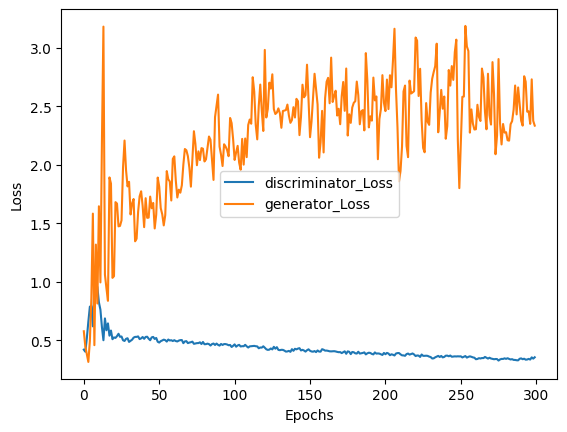

In [ ]:
plt.plot(history.history['d_loss'], label='train')
plt.plot(history.history['g_loss'], label='train')

plt.legend(['discriminator_Loss', 'generator_Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

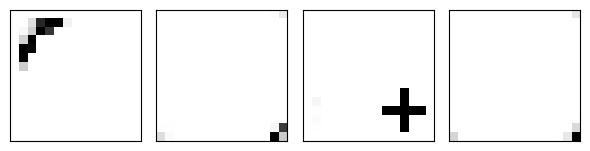

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

batch_size=8
random_latent_vectors = tf.random.normal(shape=(batch_size, 128))
generated_images = g_model(random_latent_vectors)
#generated_images = tf.where(generated_images >= 0.8, tf.ones_like(generated_images), tf.zeros_like(generated_images))
# Assuming you have a list of 8 generated images named `generated_images`
num_samples = len(generated_images)

# Create subplot grid
num_rows = 1
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 3))

# Display generated images
for i, ax in enumerate(axes.flatten()):
    if i < num_samples:
        ax.imshow(generated_images[i], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

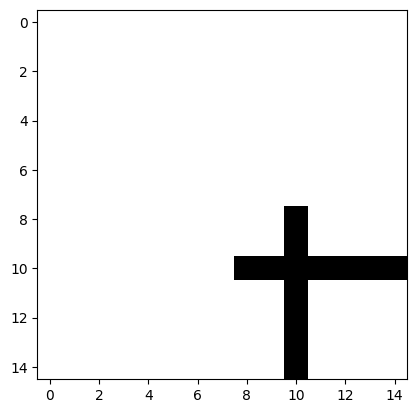

In [ ]:
batch_size=8
random_latent_vectors = tf.random.normal(shape=(batch_size, 128))
generated_images = g_model(random_latent_vectors)
generated_images = tf.where(generated_images >= 0.5, tf.ones_like(generated_images), tf.zeros_like(generated_images))
c = generated_images[0]
# Assuming you have a list of 8 generated images named `generated_images`
num_samples = len(generated_images)

# Create subplot grid
plt.imshow(generated_images[0], cmap='gray')

(30, 30, 1)


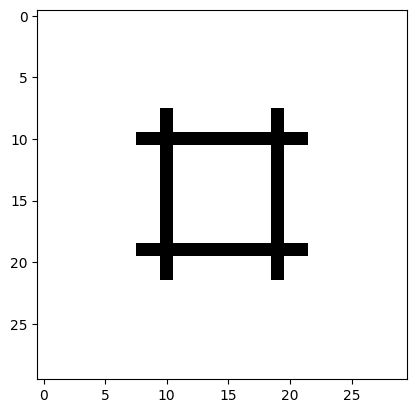

In [ ]:
c = generated_images[0]
c = np.concatenate([c,np.zeros((15,15,1))], axis=0)
c = np.concatenate([c,np.zeros((30,15,1))], axis=1)
print(c.shape)

for i in range (15):
  for j in range (15):
    c[i,29-j] = c[i,j]
    c[29-i,j] = c[i,j]
    c[29-i,29-j] = c[i,j]

plt.imshow(c, cmap='gray')
